In [183]:
#from simple_sentiment import SimpleSentiment as ss
from textblob import TextBlob as tb
import pandas as pd
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer as Sia
from gensim.parsing.preprocessing import remove_stopwords
from pathlib import Path
import seaborn as sns
%matplotlib inline

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gunin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [184]:
def filter_text(n):
    n = n.lower()
    n=re.sub("[^A-Za-z0-9]"," ",n)
    n=re.sub(r'^https?:\/\/.*[\r\n]*', '', n, flags=re.MULTILINE)
    n=re.sub(r"www.\S+",'',n)
    n = remove_stopwords(n)
    return n
sia = Sia()
j = "Given that Twitter serves as the de facto public town square, failing to adhere to free speech principles fundamentally undermines democracy. What should be done?"
a = filter_text(j)
blob = tb(a)
(blob.sentiment, sia.polarity_scores(a)['compound'], a)
#blob.sentiment[0]

(Sentiment(polarity=0.2, subjectivity=0.43333333333333335),
 -0.34,
 'given twitter serves facto public town square failing adhere free speech principles fundamentally undermines democracy')

In [185]:
raw = pd.read_html("https://kt.ijs.si/data/Emoji_sentiment_ranking")
raw_df = raw[0]
raw_df.head()

,Char,Image[twemoji],Unicodecodepoint,Occurrences[5...max],Position[0...1],Neg[0...1],Neut[0...1],Pos[0...1],Sentiment score[-1...+1],Sentiment bar(c.i. 95%),Unicode name,Unicode block
0,😂,😂,0x1f602,14622,0.805,0.247,0.285,0.468,0.221,NaN,FACE WITH TEARS OF JOY,Emoticons
1,❤,❤,0x2764,8050,0.747,0.044,0.166,0.790,0.746,NaN,HEAVY BLACK HEART,Dingbats
2,♥,♥,0x2665,7144,0.754,0.035,0.272,0.693,0.657,NaN,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,😍,0x1f60d,6359,0.765,0.052,0.219,0.729,0.678,NaN,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,😭,0x1f62d,5526,0.803,0.436,0.220,0.343,-0.093,NaN,LOUDLY CRYING FACE,Emoticons


In [186]:
emoji_sent_score_df = raw_df[['Char', 'Image[twemoji]', 'Sentiment score[-1...+1]']]
emoji_sent_score_df.head()

,Char,Image[twemoji],Sentiment score[-1...+1]
0,😂,😂,0.221
1,❤,❤,0.746
2,♥,♥,0.657
3,😍,😍,0.678
4,😭,😭,-0.093


In [200]:
csv_path = Path("stockerbot-export.csv")

tweet_df = pd.read_csv(csv_path, error_bad_lines=False)
tweet_df.head(-5)

C:\Users\gunin\anaconda3\envs\pyvizenv\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
...,...,...,...,...,...,...,...,...
28254,1019730034876211200,💰 BINANCE ALERT 💰 Binance registration is ONL...,Wed Jul 18 23:46:00 +0000 2018,KiraQueen11,BTC,Bitcoin,http://binance.com/?ref=11810992,False
28255,1019730035328966700,RT @cryptoshmitty: Here are the 5 coins in the...,Wed Jul 18 23:46:00 +0000 2018,peabodyz,BTC,Bitcoin,NaN,False
28256,1019730035576623100,Exxon Once a ‘Perfect Machine’ Is Running Dry ...,Wed Jul 18 23:46:00 +0000 2018,danhyder,XOM,Exxon Mobil Corporation,https://twitter.com/i/web/status/1019730035576...,False
28257,1019730074797408300,RT @cryptorangutang: To all the fallen heroes ...,Wed Jul 18 23:46:10 +0000 2018,_DaddyDanger,BTC,Bitcoin,NaN,False


In [188]:
cleaned_tweets = [filter_text(i) for i in tweet_df['text']]
tb_polarity = [tb(i).sentiment[0] for i in cleaned_tweets]
nltk_polarity = [sia.polarity_scores(i)['compound'] for i in cleaned_tweets]

tweet_df['cleaned_tweets'] = cleaned_tweets
tweet_df['tb_polarity'] = tb_polarity
tweet_df['nltk_polarity'] = nltk_polarity

concise_tweet_df = tweet_df[['text', 'company_names', 'cleaned_tweets', 'tb_polarity', 'nltk_polarity']]
refined_tweet_df = concise_tweet_df[concise_tweet_df['text'].apply(lambda x: len(x.split(',')) < 280)]
refined_tweet_df = refined_tweet_df.drop_duplicates()
refined_tweet_df = refined_tweet_df[refined_tweet_df["text"].str.contains("RT ") == False]
#concise_tweet_df.sort_values(by=['tb_polarity'], ascending=False)
refined_tweet_df.sort_values(by=['tb_polarity'], ascending=False)

,text,company_names,cleaned_tweets,tb_polarity,nltk_polarity
24446,Best and cheapest exchange to trade crypto. Ch...,The Procter & Gamble Company,best cheapest exchange trade crypto check regi...,1.0,0.8271
18993,Best and cheapest exchange to trade crypto. Ch...,Newell Brands Inc.,best cheapest exchange trade crypto check regi...,1.0,0.8271
21635,$PRPO - IMPRESSIVE https://t.co/PSAuZTq64K… $...,Snap Inc.,prpo impressive https t psauztq64k cbio snap b...,1.0,0.5106
17459,Best and cheapest exchange to trade crypto. Ch...,HP Inc.,best cheapest exchange trade crypto check regi...,1.0,0.8271
24766,Best Buy Co INC $BBY Market Value Declined Whi...,Best Buy Co.,best buy bby market value declined mount lucas...,1.0,0.6705
...,...,...,...,...,...
27252,@Guruleaks1 @WilliamKaraman @AlderLaneeggs @Jo...,Netflix,guruleaks1 williamkaraman alderlaneeggs john h...,-1.0,0.0772
25692,@RampCapitalLLC Oh and lest I forget... my wor...,VelocityShares Daily 2x VIX ST ETN,rampcapitalllc oh lest forget worst bought boa...,-1.0,-0.7184
27411,@Guruleaks1 @WilliamKaraman What a disgusting ...,Invesco QQQ Trust,guruleaks1 williamkaraman disgusting slab lolz...,-1.0,0.0772
220,$HRS -141.worst-case.target,Harris Corporation,hrs 141 worst case target,-1.0,-0.6249


In [189]:
refined_tweet_df.sort_values(by=['nltk_polarity'], ascending=False)

,text,company_names,cleaned_tweets,tb_polarity,nltk_polarity
11085,Yay! Got our unbelievable Sold Put 11th win in...,The Hershey Company,yay got unbelievable sold 11th win row today c...,0.302500,0.9485
4660,🎉🎉🎉 This project is very strong team that does...,DXC Technology Company,project strong team lot work great future supp...,0.411111,0.9403
23890,Do it for the freedom! 🙌🏼 #Hustle #Work #Earn...,Snap Inc.,freedom hustle work earn income wealth rich su...,0.225000,0.9403
27660,Absolutely love this app! Join @RobinhoodApp ...,Sprint Corporation,absolutely love app join robinhoodapp ll stock...,0.466667,0.9332
24139,A free share of #stock is too good to pass up!...,Snap Inc.,free share stock good pass refer friend 1 250 ...,0.550000,0.9274
...,...,...,...,...,...
26446,@CNBCFastMoney time to lose Dan Nathan his Wro...,Micron Technology,cnbcfastmoney time lose dan nathan wrong polit...,-0.337500,-0.9001
27492,Yahoo Finance: How Twitter's fake account prob...,Invesco QQQ Trust,yahoo finance twitter s fake account problem h...,-0.500000,-0.9062
4210,The report is excellent in terms of record pro...,Prudential Financial,report excellent terms record production quart...,-0.267949,-0.9231
3958,Terrorist gang @ODNIgov continues to get paid ...,Boston Properties,terrorist gang odnigov continues paid bxp leas...,0.000000,-0.9231


,tb_polarity,nltk_polarity
tb_polarity,1.000000,0.409482
nltk_polarity,0.409482,1.000000


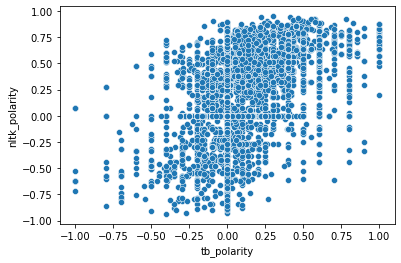

In [190]:
refined_corr = refined_tweet_df.corr()
polarity_df = refined_tweet_df[['tb_polarity', 'nltk_polarity']]
sns.scatterplot(x='tb_polarity', y='nltk_polarity', data=polarity_df)
refined_corr

In [191]:
f = refined_tweet_df.iloc[11085]
print(f)

text              Btw Estimated #Earnings Per Share for $HIMX is...
company_names                                    Himax Technologies
cleaned_tweets    btw estimated earnings share himx 0 09 s 1 1 c...
tb_polarity                                                     0.0
nltk_polarity                                                 0.296
Name: 12843, dtype: object


In [206]:
refined_tweet_df.groupby('company_names').mean().sort_values(by=['nltk_polarity'], ascending=False)

,tb_polarity,nltk_polarity
company_names,,
LyondellBasell Industries N.V.,0.018502,0.563280
Federal Realty Investment Trust,-0.016667,0.534140
Intel*U.S.,0.000000,0.476700
Whiting Petroleum Corporation,0.104878,0.470266
Ensco plc,0.086890,0.464621
...,...,...
Time Warner,0.000000,-0.381800
American,-0.100000,-0.510600
eBay,-0.375000,-0.585900


In [207]:
refined_tweet_df.groupby('company_names').mean().sort_values(by=['tb_polarity'], ascending=False)

,tb_polarity,nltk_polarity
company_names,,
Facebook*Alphabet*Alphabet,0.500000,0.458800
Harris,0.500000,0.340000
Best Buy Co.,0.384974,0.340904
CBS,0.357143,0.401900
Noble Energy,0.346186,0.420432
...,...,...
Stanley Black & Decker,-0.079599,0.097309
Apple Inc.,-0.080460,-0.091966
American,-0.100000,-0.510600
